# Introduction
<b>pandas</b> is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.
<br>
<br>
<br>
<b>Interesting Read</b> : [mlcourse.ai : EDA with Pandas](https://mlcourse.ai/articles/topic1-exploratory-data-analysis-with-pandas/)

<img src='https://habrastorage.org/webt/ia/m9/zk/iam9zkyzqebnf_okxipihkgjwnw.jpeg' width='300' align='left'>
<br>
<br>
<br>
<br>
<br>
<b>Much of this Notebook has been adopted from `pandas` docs</b>

# Imports

In [1]:
import pandas as pd
from datetime import datetime
from pytz import all_timezones

In [2]:
pd.__version__

'1.1.4'

In [3]:
?pd

# Load and Explore the Dataset

In [4]:
root_path = '../'
raw_datapath = root_path+'Raw Data/'
prepared_datapath = root_path+'Prepared Data/'

britannia_datapath = raw_datapath+'BRITANNIA.NS.csv'
mpc61_datapath = raw_datapath+'MPC61.txt'

# Pandas DataStructures

`pandas` creates and stores data in rectangular format. 

On a broad stroke there are majorly two forms of a datatype in `pandas` :-
- [Series](https://pandas.pydata.org/docs/user_guide/dsintro.html#series) : "Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.)."
- [Dataframe](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe) : "DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects."

## Series

<b>Series - Generating One</b>

In [23]:
data_size=20
sdata=np.random.normal(20, scale=5.0, size=(data_size,))
sindex=np.arange(20)
pd_series = pd.Series(sdata, 
                      index=sindex)
pd_series

0     18.667555
1     15.602742
2     16.288624
3     16.181745
4     16.587200
5     18.666002
6     14.971615
7     17.253679
8     35.394967
9     21.334163
10    18.043309
11    26.807233
12    18.499799
13    13.953711
14    17.172692
15    19.202201
16    18.747521
17    11.979380
18    18.041800
19    21.106111
dtype: float64

<b>Series - Indicing</b>

In [11]:
pd_series.iloc[15]

11.618167016203724

In [9]:
np.arange(10)[5:]

array([5, 6, 7, 8, 9])

**Q)** Get all the values in the series after indices 15, how?

In [14]:
pd_series.loc[14:18]

14    20.837549
15    11.618167
16    22.543750
17    23.452071
18    14.361109
dtype: float64

In [ ]:
#----------YOUR SOLUTION-----------#
#....


<b>Series - Query</b>

In [15]:
pd_series[pd_series>20]

1     24.705206
3     23.519568
5     29.141029
6     22.131325
7     25.540485
11    32.004724
12    30.339742
13    21.186810
14    20.837549
16    22.543750
17    23.452071
19    27.171718
dtype: float64

<b>Series - Stats</b>

In [16]:
pd_series.describe()

count    20.000000
mean     20.983236
std       6.384995
min       8.718741
25%      15.864224
50%      21.659067
75%      24.914025
max      32.004724
dtype: float64

<b>Series - To a Dictionary</b>

In [17]:
pd_series.to_dict()

{0: 15.655585544228748,
 1: 24.705205701333057,
 2: 8.718741290252714,
 3: 23.519568081370487,
 4: 19.956670695997083,
 5: 29.1410291019519,
 6: 22.131325027651947,
 7: 25.54048450712525,
 8: 13.074861936038525,
 9: 15.933769865468918,
 10: 17.771836502171393,
 11: 32.00472404918345,
 12: 30.339742251127433,
 13: 21.18680984407452,
 14: 20.83754933281038,
 15: 11.618167016203724,
 16: 22.5437496362887,
 17: 23.45207099299131,
 18: 14.36110859824446,
 19: 27.171717839342875}

<b>Series - Numpy Like Vectorized Operations</b>

In [18]:
pd_series*pd_series

0      245.097359
1      610.347189
2       76.016450
3      553.170083
4      398.268705
5      849.199577
6      489.795547
7      652.316349
8      170.952015
9      253.885022
10     315.838173
11    1024.302361
12     920.499960
13     448.880911
14     434.203462
15     134.981805
16     508.220648
17     549.999634
18     206.241440
19     738.302250
dtype: float64

<b>Series - Giving it a name</b>

In [19]:
pd_series.name = 'Random Normal Series'
pd_series

0     15.655586
1     24.705206
2      8.718741
3     23.519568
4     19.956671
5     29.141029
6     22.131325
7     25.540485
8     13.074862
9     15.933770
10    17.771837
11    32.004724
12    30.339742
13    21.186810
14    20.837549
15    11.618167
16    22.543750
17    23.452071
18    14.361109
19    27.171718
Name: Random Normal Series, dtype: float64

<b>Series - To a DataFrame</b>

In [20]:
pd_series.to_frame()

,Random Normal Series
0,15.655586
1,24.705206
2,8.718741
3,23.519568
4,19.956671
5,29.141029
6,22.131325
7,25.540485
8,13.074862
9,15.933770


## DataFrame

In [24]:
# What will happen to the name that we gave to the series above?
dfdata_dict = {'one':pd_series,
               'two':pd_series*2}
datadf = pd.DataFrame(dfdata_dict)
datadf.head()

,one,two
0,18.667555,37.335109
1,15.602742,31.205484
2,16.288624,32.577247
3,16.181745,32.363490
4,16.587200,33.174400


<b>DataFrame - Creating One</b>

DataFrame can be creating by feeding any of the following:

- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- Structured or record ndarray
- A Series
- Another DataFrame

In [25]:
countrytemp_data = {'Country':['Brazil', 'India', 'India', 'Germany', 'China', 'Zambia'],
                    'City':['Brasília', 'New Delhi', 'Kashmir', 'Berlin', 'Beijing', 'Lusaka'],
                    'AverageTemperature':[30.1, 34.3, 22.4, 19.9, 26.2, 30.3],
                    'Humidity':[0.65, 0.67, 0.49, 0.44, 0.45, 0.76]}

In [28]:
temperatureDf = pd.DataFrame(countrytemp_data,
                             index=['a', 'b', 'c', 'd', 'e', 'f'])
temperatureDf

,Country,City,AverageTemperature,Humidity
a,Brazil,Brasília,30.1,0.65
b,India,New Delhi,34.3,0.67
c,India,Kashmir,22.4,0.49
d,Germany,Berlin,19.9,0.44
e,China,Beijing,26.2,0.45
f,Zambia,Lusaka,30.3,0.76


<b>DataFrame - Indicing</b>

In [29]:
temperatureDf.index

Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')

In [30]:
temperatureDf[temperatureDf.index>'b']

,Country,City,AverageTemperature,Humidity
c,India,Kashmir,22.4,0.49
d,Germany,Berlin,19.9,0.44
e,China,Beijing,26.2,0.45
f,Zambia,Lusaka,30.3,0.76


In [31]:
temperatureDf.iloc[2:4,:]

,Country,City,AverageTemperature,Humidity
c,India,Kashmir,22.4,0.49
d,Germany,Berlin,19.9,0.44


In [32]:
temperatureDf.iloc[:,1:3]

,City,AverageTemperature
a,Brasília,30.1
b,New Delhi,34.3
c,Kashmir,22.4
d,Berlin,19.9
e,Beijing,26.2
f,Lusaka,30.3


In [33]:
temperatureDf['b':'d']

,Country,City,AverageTemperature,Humidity
b,India,New Delhi,34.3,0.67
c,India,Kashmir,22.4,0.49
d,Germany,Berlin,19.9,0.44


**Q)** I want the indices from 'b' to 'd', and first two columns 'Country' & 'City'

In [35]:
temperatureDf.loc['b':'d'].iloc[:,:2]

,Country,City
b,India,New Delhi
c,India,Kashmir
d,Germany,Berlin


In [ ]:
#----------YOUR SOLUTION-----------#
#....


<b>DataFrame - Stats</b>

In [36]:
temperatureDf.describe()

,AverageTemperature,Humidity
count,6.000000,6.000000
mean,27.200000,0.576667
std,5.399259,0.134114
min,19.900000,0.440000
25%,23.350000,0.460000
50%,28.150000,0.570000
75%,30.250000,0.665000
max,34.300000,0.760000


In [41]:
temperatureDf.AverageTemperature.min()

19.9

In [42]:
temperatureDf.Humidity.min(), temperatureDf.Humidity.max()

(0.44, 0.76)

<b>DataFrame - Plot</b>

In [43]:
temperatureDf

,Country,City,AverageTemperature,Humidity
a,Brazil,Brasília,30.1,0.65
b,India,New Delhi,34.3,0.67
c,India,Kashmir,22.4,0.49
d,Germany,Berlin,19.9,0.44
e,China,Beijing,26.2,0.45
f,Zambia,Lusaka,30.3,0.76


<AxesSubplot:>

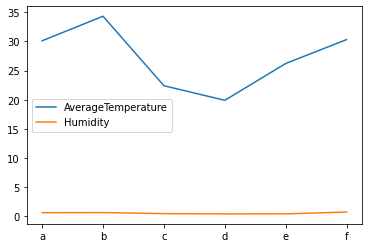

In [44]:
temperatureDf.plot()

array([<AxesSubplot:xlabel='City'>, <AxesSubplot:xlabel='City'>],
      dtype=object)

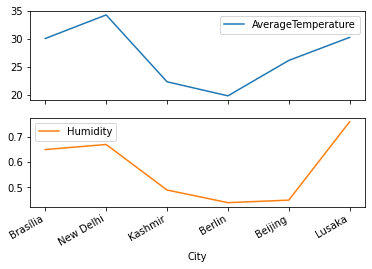

In [47]:
temperatureDf.set_index('City').plot(subplots=True)

<b>DataFrame - Groupby Operations</b>

In [48]:
temperatureDf

,Country,City,AverageTemperature,Humidity
a,Brazil,Brasília,30.1,0.65
b,India,New Delhi,34.3,0.67
c,India,Kashmir,22.4,0.49
d,Germany,Berlin,19.9,0.44
e,China,Beijing,26.2,0.45
f,Zambia,Lusaka,30.3,0.76


In [49]:
temperatureDf.groupby(['Country']).size()

Country
Brazil     1
China      1
Germany    1
India      2
Zambia     1
dtype: int64

In [51]:
# The result of groupby operation is usually in Multiindex Series Format
temperatureDf.groupby(['Country']).AverageTemperature.mean()

Country
Brazil     30.10
China      26.20
Germany    19.90
India      28.35
Zambia     30.30
Name: AverageTemperature, dtype: float64

In [50]:
for egidx, eg in temperatureDf.groupby(['Country']):
    print(egidx)
    print(eg)
    print()

Brazil
  Country      City  AverageTemperature  Humidity
a  Brazil  Brasília                30.1      0.65

China
  Country     City  AverageTemperature  Humidity
e   China  Beijing                26.2      0.45

Germany
   Country    City  AverageTemperature  Humidity
d  Germany  Berlin                19.9      0.44

India
  Country       City  AverageTemperature  Humidity
b   India  New Delhi                34.3      0.67
c   India    Kashmir                22.4      0.49

Zambia
  Country    City  AverageTemperature  Humidity
f  Zambia  Lusaka                30.3      0.76



In [55]:
# Why did it only show one Value?
# temperatureDf.groupby(['Country']).AverageTemperature.nth(0)
# temperatureDf.groupby(['Country']).AverageTemperature.nth(1)
temperatureDf.groupby(['Country']).AverageTemperature.nth(-1)

Country
Brazil     30.1
China      26.2
Germany    19.9
India      22.4
Zambia     30.3
Name: AverageTemperature, dtype: float64

## Reading a file to Pandas DataFrame

<b>Reading a .csv file</b>

In [84]:
britannia_datapath

'../Raw Data/BRITANNIA.NS.csv'

In [68]:
britannia_data = pd.read_csv(britannia_datapath, index_col=0, parse_dates=True)
britannia_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-02,10.6000,10.6000,10.6000,10.6000,1.312736,1500.0
1996-01-03,10.6667,10.6667,10.4667,10.4667,1.296228,3000.0
1996-01-04,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-05,10.6667,10.6667,10.4667,10.4733,1.297045,6000.0
1996-01-08,10.3333,10.5333,10.3333,10.5333,1.304476,3000.0


In [69]:
britannia_data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [70]:
britannia_data.index

DatetimeIndex(['1996-01-02', '1996-01-03', '1996-01-04', '1996-01-05',
               '1996-01-08', '1996-01-09', '1996-01-10', '1996-01-11',
               '1996-01-12', '1996-01-15',
               ...
               '2020-11-13', '2020-11-14', '2020-11-17', '2020-11-18',
               '2020-11-19', '2020-11-20', '2020-11-23', '2020-11-24',
               '2020-11-25', '2020-11-26'],
              dtype='datetime64[ns]', name='Date', length=6280, freq=None)

<b>Reading a .txt file</b>

In [71]:
pd.read_fwf(mpc61_datapath)

,This is the data file MPC61.DAT.
0,Source: This example is used on page mpc612.ht...
1,This is a case study of a gauge study for resi...
2,measurements. Data is from Carroll Croakin.
3,Description: Measurements of resistivity on 1...
4,according to an ASTM Standard Test Method (AST...
...,...
328,2 142. 2362. 4. 18. 2. 22.8...
329,2 142. 2362. 4. 19. 2. 22.8...
330,2 142. 2362. 4. 19. 1. 22.7...
331,2 142. 2362. 4. 20. 2. 22.8...


In [72]:
mpc61_datapath

'../Raw Data/MPC61.txt'

In [73]:
pd.read_csv(mpc61_datapath)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 9, saw 2


In [74]:
mpc61_data = pd.read_fwf(mpc61_datapath,
                         skiprows=range(50),
                         names=['RUN', 'WAFER', 'PROBE',
                                'MONTH', 'DAY', 'OP',
                                'TEMP', 'AVERAGE', 'STDDEV'])
mpc61_data.head()

,RUN,WAFER,PROBE,MONTH,DAY,OP,TEMP,AVERAGE,STDDEV
0,1,138.0,1.0,3.0,15.0,1.0,22.98,95.1772,0.1191
1,1,138.0,1.0,3.0,17.0,1.0,23.02,95.1567,0.0183
2,1,138.0,1.0,3.0,18.0,1.0,22.79,95.1937,0.1282
3,1,138.0,1.0,3.0,21.0,1.0,23.17,95.1959,0.0398
4,1,138.0,1.0,3.0,23.0,2.0,23.25,95.1442,0.0346


# Pandas Datetime Operations

"Pandas builds upon `dateutil`, `datetime` & `numpy.datetime64` the tools just discussed to provide a Timestamp object, which combines the ease-of-use of datetime and dateutil with the efficient storage and vectorized interface of numpy.datetime64. From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame" - [Jake-Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html#Dates-and-times-in-pandas:-best-of-both-worlds)

<b>Generating a DatetimeIndex</b>

Look at the `dtype` and `freq`

In [76]:
datetime.now().strftime('%Y-%m-%d')

'2020-12-07'

In [75]:
current_date = pd.to_datetime(datetime.now().strftime('%Y-%m-%d'))
roll_dates   = current_date+pd.to_timedelta(range(10), 'D')
current_date, type(current_date), roll_dates

(Timestamp('2020-12-07 00:00:00'),
 pandas._libs.tslibs.timestamps.Timestamp,
 DatetimeIndex(['2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10',
                '2020-12-11', '2020-12-12', '2020-12-13', '2020-12-14',
                '2020-12-15', '2020-12-16'],
               dtype='datetime64[ns]', freq=None))

<b>How can we set the frequency? And is it possible to infer the frequency intrinsically?</b>

In [77]:
pd.infer_freq(roll_dates)

'D'

In [78]:
roll_dates.freq='D'
roll_dates

DatetimeIndex(['2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10',
               '2020-12-11', '2020-12-12', '2020-12-13', '2020-12-14',
               '2020-12-15', '2020-12-16'],
              dtype='datetime64[ns]', freq='D')

In [79]:
roll_dates.freq = 'M'

ValueError: Inferred frequency D from passed values does not conform to passed frequency M

<b>Lets make a Time Series with Dates as index</b>

In [82]:
sindex = ['2020-01-01', '2020-01-15', '2020-01-31',
          '2020-02-01', '2020-02-15', '2020-02-28',
          '2020-03-01', '2020-03-15', '2020-03-31',
          '2021-01-01', '2021-01-15', '2021-01-31',
          '2021-02-01', '2021-02-15', '2021-02-29',
          '2021-03-01', '2021-03-15', '2021-03-31']
dt_series = pd.Series(np.arange(18), index=sindex)
dt_series
dt_series.index

Index(['2020-01-01', '2020-01-15', '2020-01-31', '2020-02-01', '2020-02-15',
       '2020-02-28', '2020-03-01', '2020-03-15', '2020-03-31', '2021-01-01',
       '2021-01-15', '2021-01-31', '2021-02-01', '2021-02-15', '2021-02-29',
       '2021-03-01', '2021-03-15', '2021-03-31'],
      dtype='object')

<b>Lets try to slice the series, and retrieve data only of year `2020`</b>

In [83]:
dt_series['2020']

KeyError: '2020'

<b>But why, cant i index this series using just the year, why didnt pandas understand that?</b>

In [85]:
dt_series.index

Index(['2020-01-01', '2020-01-15', '2020-01-31', '2020-02-01', '2020-02-15',
       '2020-02-28', '2020-03-01', '2020-03-15', '2020-03-31', '2021-01-01',
       '2021-01-15', '2021-01-31', '2021-02-01', '2021-02-15', '2021-02-29',
       '2021-03-01', '2021-03-15', '2021-03-31'],
      dtype='object')

In [86]:
dt_series.index = pd.to_datetime(dt_series.index)

ParserError: day is out of range for month: 2021-02-29

So basically, pandas is trying to parse the date `2021-02-29`, but while doing so, has encountered an error saying the 29th is not in the calendar

In [87]:
sindex = ['2020-01-01', '2020-01-15', '2020-01-31',
          '2020-02-01', '2020-02-15', '2020-02-28',
          '2020-03-01', '2020-03-15', '2020-03-31',
          '2021-01-01', '2021-01-15', '2021-01-31',
          '2021-02-01', '2021-02-15', '2021-02-28', # Change the date
          '2021-03-01', '2021-03-15', '2021-03-31']
dt_series.index = sindex
dt_series

2020-01-01     0
2020-01-15     1
2020-01-31     2
2020-02-01     3
2020-02-15     4
2020-02-28     5
2020-03-01     6
2020-03-15     7
2020-03-31     8
2021-01-01     9
2021-01-15    10
2021-01-31    11
2021-02-01    12
2021-02-15    13
2021-02-28    14
2021-03-01    15
2021-03-15    16
2021-03-31    17
dtype: int64

<b>Once the parsing error cause has been fixed lets try to make a `DatetimeIndex` for our series</b>

In [88]:
dt_series.index = pd.to_datetime(dt_series.index)
dt_series.index

DatetimeIndex(['2020-01-01', '2020-01-15', '2020-01-31', '2020-02-01',
               '2020-02-15', '2020-02-28', '2020-03-01', '2020-03-15',
               '2020-03-31', '2021-01-01', '2021-01-15', '2021-01-31',
               '2021-02-01', '2021-02-15', '2021-02-28', '2021-03-01',
               '2021-03-15', '2021-03-31'],
              dtype='datetime64[ns]', freq=None)

<b>Now can we filter out only `2020`</b>

In [90]:
dt_series['2020-02']

2020-02-01    3
2020-02-15    4
2020-02-28    5
dtype: int64

****
<b>[Pandas has four main concepts pertaining to Time](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#overview)</b>

> <b>Where methods of Pandas shine - Human Readable Times..</b>

1.) Timestamp - Similar to datetime, its an instnace in Time eg pd.Timestamp(2020,12,7) == pd.Timestamp("7th December 2020")

2.) Timedeltas - A absolute duration of time, eg pd.Timedelta('1 day') = 24 hours

3.) Timespans - A span of time, i.e Starting from 2020-12-07, every other month.

4.) DateOffsets - To support caneldar arithmetic, similar to `dateutil.relativedelta.relativedelta`


<table class="table">
<colgroup>
<col style="width: 15%">
<col style="width: 12%">
<col style="width: 13%">
<col style="width: 31%">
<col style="width: 28%">
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Concept</p></th>
<th class="head"><p>Scalar Class</p></th>
<th class="head"><p>Array Class</p></th>
<th class="head"><p>pandas Data Type</p></th>
<th class="head"><p>Primary Creation Method</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>Date times</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">Timestamp</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">DatetimeIndex</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">datetime64[ns]</span></code> or <code class="docutils literal notranslate"><span class="pre">datetime64[ns,</span> <span class="pre">tz]</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">to_datetime</span></code> or <code class="docutils literal notranslate"><span class="pre">date_range</span></code></p></td>
</tr>
<tr class="row-odd"><td><p>Time deltas</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">Timedelta</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">TimedeltaIndex</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">timedelta64[ns]</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">to_timedelta</span></code> or <code class="docutils literal notranslate"><span class="pre">timedelta_range</span></code></p></td>
</tr>
<tr class="row-even"><td><p>Time spans</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">Period</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">PeriodIndex</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">period[freq]</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">Period</span></code> or <code class="docutils literal notranslate"><span class="pre">period_range</span></code></p></td>
</tr>
<tr class="row-odd"><td><p>Date offsets</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">DateOffset</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">None</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">None</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">DateOffset</span></code></p></td>
</tr>
</tbody>
</table>

****
<b>Playing around with Timestamps</b>

Its inferred format will always be in **YYYY-MM-DD HH:MM:SS...**

<b>Attributes available to Pandas Timestamp object :</b>

<table class="longtable table autosummary">
<colgroup>
<col style="width: 10%">
<col style="width: 90%">
</colgroup>
<tbody>
<tr class="row-odd"><td><p><a class="reference internal" href="pandas.Timestamp.asm8.html#pandas.Timestamp.asm8" title="pandas.Timestamp.asm8"><code class="xref py py-obj docutils literal notranslate"><span class="pre">asm8</span></code></a></p></td>
<td><p>Return numpy datetime64 format in nanoseconds.</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="pandas.Timestamp.dayofweek.html#pandas.Timestamp.dayofweek" title="pandas.Timestamp.dayofweek"><code class="xref py py-obj docutils literal notranslate"><span class="pre">dayofweek</span></code></a></p></td>
<td><p>Return day of the week.</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="pandas.Timestamp.dayofyear.html#pandas.Timestamp.dayofyear" title="pandas.Timestamp.dayofyear"><code class="xref py py-obj docutils literal notranslate"><span class="pre">dayofyear</span></code></a></p></td>
<td><p>Return the day of the year.</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="pandas.Timestamp.days_in_month.html#pandas.Timestamp.days_in_month" title="pandas.Timestamp.days_in_month"><code class="xref py py-obj docutils literal notranslate"><span class="pre">days_in_month</span></code></a></p></td>
<td><p>Return the number of days in the month.</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="pandas.Timestamp.daysinmonth.html#pandas.Timestamp.daysinmonth" title="pandas.Timestamp.daysinmonth"><code class="xref py py-obj docutils literal notranslate"><span class="pre">daysinmonth</span></code></a></p></td>
<td><p>Return the number of days in the month.</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="pandas.Timestamp.freqstr.html#pandas.Timestamp.freqstr" title="pandas.Timestamp.freqstr"><code class="xref py py-obj docutils literal notranslate"><span class="pre">freqstr</span></code></a></p></td>
<td><p>Return the total number of days in the month.</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="pandas.Timestamp.is_leap_year.html#pandas.Timestamp.is_leap_year" title="pandas.Timestamp.is_leap_year"><code class="xref py py-obj docutils literal notranslate"><span class="pre">is_leap_year</span></code></a></p></td>
<td><p>Return True if year is a leap year.</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="pandas.Timestamp.is_month_end.html#pandas.Timestamp.is_month_end" title="pandas.Timestamp.is_month_end"><code class="xref py py-obj docutils literal notranslate"><span class="pre">is_month_end</span></code></a></p></td>
<td><p>Return True if date is last day of month.</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="pandas.Timestamp.is_month_start.html#pandas.Timestamp.is_month_start" title="pandas.Timestamp.is_month_start"><code class="xref py py-obj docutils literal notranslate"><span class="pre">is_month_start</span></code></a></p></td>
<td><p>Return True if date is first day of month.</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="pandas.Timestamp.is_quarter_end.html#pandas.Timestamp.is_quarter_end" title="pandas.Timestamp.is_quarter_end"><code class="xref py py-obj docutils literal notranslate"><span class="pre">is_quarter_end</span></code></a></p></td>
<td><p>Return True if date is last day of the quarter.</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="pandas.Timestamp.is_quarter_start.html#pandas.Timestamp.is_quarter_start" title="pandas.Timestamp.is_quarter_start"><code class="xref py py-obj docutils literal notranslate"><span class="pre">is_quarter_start</span></code></a></p></td>
<td><p>Return True if date is first day of the quarter.</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="pandas.Timestamp.is_year_end.html#pandas.Timestamp.is_year_end" title="pandas.Timestamp.is_year_end"><code class="xref py py-obj docutils literal notranslate"><span class="pre">is_year_end</span></code></a></p></td>
<td><p>Return True if date is last day of the year.</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="pandas.Timestamp.is_year_start.html#pandas.Timestamp.is_year_start" title="pandas.Timestamp.is_year_start"><code class="xref py py-obj docutils literal notranslate"><span class="pre">is_year_start</span></code></a></p></td>
<td><p>Return True if date is first day of the year.</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="pandas.Timestamp.quarter.html#pandas.Timestamp.quarter" title="pandas.Timestamp.quarter"><code class="xref py py-obj docutils literal notranslate"><span class="pre">quarter</span></code></a></p></td>
<td><p>Return the quarter of the year.</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="pandas.Timestamp.tz.html#pandas.Timestamp.tz" title="pandas.Timestamp.tz"><code class="xref py py-obj docutils literal notranslate"><span class="pre">tz</span></code></a></p></td>
<td><p>Alias for tzinfo.</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="pandas.Timestamp.week.html#pandas.Timestamp.week" title="pandas.Timestamp.week"><code class="xref py py-obj docutils literal notranslate"><span class="pre">week</span></code></a></p></td>
<td><p>Return the week number of the year.</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="pandas.Timestamp.weekofyear.html#pandas.Timestamp.weekofyear" title="pandas.Timestamp.weekofyear"><code class="xref py py-obj docutils literal notranslate"><span class="pre">weekofyear</span></code></a></p></td>
<td><p>Return the week number of the year.</p></td>
</tr>
</tbody>
</table>

In [91]:
pd.Timestamp(datetime.now())

Timestamp('2020-12-07 10:33:43.586192')

In [92]:
pd.Timestamp("7th December 2020")

Timestamp('2020-12-07 00:00:00')

In [93]:
pd.Timestamp("December 7 2020")

Timestamp('2020-12-07 00:00:00')

In [94]:
pd.Timestamp("7th of December 2020 9:20:23.123123")

Timestamp('2020-12-07 09:20:23.123123')

In [95]:
pd.Timestamp("7th Dec 2020 7 PM")

Timestamp('2020-12-07 19:00:00')

In [96]:
pd.Timestamp("7th Dec 2020 7 PM")==pd.Timestamp("7th Dec 2020 19:00")

True

In [97]:
pd.Timestamp("7/12 2020")==pd.Timestamp("2020-7/12")

True

In [99]:
pd.Timestamp("7/12/2020")==pd.Timestamp("12/7/2020")

False

In [100]:
pd.Timestamp(year=2020, month=12, day=7)

Timestamp('2020-12-07 00:00:00')

In [101]:
pdtstamp = pd.Timestamp("7th Dec 2020 7 PM")
pdtstamp

Timestamp('2020-12-07 19:00:00')

In [103]:
print('**Timestamp Attributes**')
print('------------------------')
print('Day Name   : ', pdtstamp.day_name())
print('Quarter    : ', pdtstamp.quarter)
print('Date       : ', pdtstamp.day)
print('Month      : ', pdtstamp.month)
print('Monthdays  : ', pdtstamp.daysinmonth)
print('Year       : ', pdtstamp.year)
print('Week yr    : ', pdtstamp.weekofyear)

**Timestamp Attributes**
------------------------
Day Name   :  Monday
Quarter    :  4
Date       :  7
Month      :  12
Monthdays  :  31
Year       :  2020
Week yr    :  50


****
<b>Playing around with `date_range`, `bdate_range`, Time Period</b>

What is the difference between TimePeriod and Timestamp?
> Well in most of the cases, atleast Time Series problems, its necessary to have a representation of the span instead of just a point in time

****
<b>Available `freq` or `offset_aliases` :</b>
<table class="colwidths-given table">
<colgroup>
<col style="width: 16%">
<col style="width: 16%">
<col style="width: 68%">
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Date Offset</p></th>
<th class="head"><p>Frequency String</p></th>
<th class="head"><p>Description</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.DateOffset.html#pandas.tseries.offsets.DateOffset" title="pandas.tseries.offsets.DateOffset"><code class="xref py py-class docutils literal notranslate"><span class="pre">DateOffset</span></code></a></p></td>
<td><p>None</p></td>
<td><p>Generic offset class, defaults to 1 calendar day</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.BDay.html#pandas.tseries.offsets.BDay" title="pandas.tseries.offsets.BDay"><code class="xref py py-class docutils literal notranslate"><span class="pre">BDay</span></code></a> or <a class="reference internal" href="../reference/api/pandas.tseries.offsets.BusinessDay.html#pandas.tseries.offsets.BusinessDay" title="pandas.tseries.offsets.BusinessDay"><code class="xref py py-class docutils literal notranslate"><span class="pre">BusinessDay</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'B'</span></code></p></td>
<td><p>business day (weekday)</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.CDay.html#pandas.tseries.offsets.CDay" title="pandas.tseries.offsets.CDay"><code class="xref py py-class docutils literal notranslate"><span class="pre">CDay</span></code></a> or <a class="reference internal" href="../reference/api/pandas.tseries.offsets.CustomBusinessDay.html#pandas.tseries.offsets.CustomBusinessDay" title="pandas.tseries.offsets.CustomBusinessDay"><code class="xref py py-class docutils literal notranslate"><span class="pre">CustomBusinessDay</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'C'</span></code></p></td>
<td><p>custom business day</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.Week.html#pandas.tseries.offsets.Week" title="pandas.tseries.offsets.Week"><code class="xref py py-class docutils literal notranslate"><span class="pre">Week</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'W'</span></code></p></td>
<td><p>one week, optionally anchored on a day of the week</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.WeekOfMonth.html#pandas.tseries.offsets.WeekOfMonth" title="pandas.tseries.offsets.WeekOfMonth"><code class="xref py py-class docutils literal notranslate"><span class="pre">WeekOfMonth</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'WOM'</span></code></p></td>
<td><p>the x-th day of the y-th week of each month</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.LastWeekOfMonth.html#pandas.tseries.offsets.LastWeekOfMonth" title="pandas.tseries.offsets.LastWeekOfMonth"><code class="xref py py-class docutils literal notranslate"><span class="pre">LastWeekOfMonth</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'LWOM'</span></code></p></td>
<td><p>the x-th day of the last week of each month</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.MonthEnd.html#pandas.tseries.offsets.MonthEnd" title="pandas.tseries.offsets.MonthEnd"><code class="xref py py-class docutils literal notranslate"><span class="pre">MonthEnd</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'M'</span></code></p></td>
<td><p>calendar month end</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.MonthBegin.html#pandas.tseries.offsets.MonthBegin" title="pandas.tseries.offsets.MonthBegin"><code class="xref py py-class docutils literal notranslate"><span class="pre">MonthBegin</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'MS'</span></code></p></td>
<td><p>calendar month begin</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.BMonthEnd.html#pandas.tseries.offsets.BMonthEnd" title="pandas.tseries.offsets.BMonthEnd"><code class="xref py py-class docutils literal notranslate"><span class="pre">BMonthEnd</span></code></a> or <a class="reference internal" href="../reference/api/pandas.tseries.offsets.BusinessMonthEnd.html#pandas.tseries.offsets.BusinessMonthEnd" title="pandas.tseries.offsets.BusinessMonthEnd"><code class="xref py py-class docutils literal notranslate"><span class="pre">BusinessMonthEnd</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'BM'</span></code></p></td>
<td><p>business month end</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.BMonthBegin.html#pandas.tseries.offsets.BMonthBegin" title="pandas.tseries.offsets.BMonthBegin"><code class="xref py py-class docutils literal notranslate"><span class="pre">BMonthBegin</span></code></a> or <a class="reference internal" href="../reference/api/pandas.tseries.offsets.BusinessMonthBegin.html#pandas.tseries.offsets.BusinessMonthBegin" title="pandas.tseries.offsets.BusinessMonthBegin"><code class="xref py py-class docutils literal notranslate"><span class="pre">BusinessMonthBegin</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'BMS'</span></code></p></td>
<td><p>business month begin</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.CBMonthEnd.html#pandas.tseries.offsets.CBMonthEnd" title="pandas.tseries.offsets.CBMonthEnd"><code class="xref py py-class docutils literal notranslate"><span class="pre">CBMonthEnd</span></code></a> or <a class="reference internal" href="../reference/api/pandas.tseries.offsets.CustomBusinessMonthEnd.html#pandas.tseries.offsets.CustomBusinessMonthEnd" title="pandas.tseries.offsets.CustomBusinessMonthEnd"><code class="xref py py-class docutils literal notranslate"><span class="pre">CustomBusinessMonthEnd</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'CBM'</span></code></p></td>
<td><p>custom business month end</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.CBMonthBegin.html#pandas.tseries.offsets.CBMonthBegin" title="pandas.tseries.offsets.CBMonthBegin"><code class="xref py py-class docutils literal notranslate"><span class="pre">CBMonthBegin</span></code></a> or <a class="reference internal" href="../reference/api/pandas.tseries.offsets.CustomBusinessMonthBegin.html#pandas.tseries.offsets.CustomBusinessMonthBegin" title="pandas.tseries.offsets.CustomBusinessMonthBegin"><code class="xref py py-class docutils literal notranslate"><span class="pre">CustomBusinessMonthBegin</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'CBMS'</span></code></p></td>
<td><p>custom business month begin</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.SemiMonthEnd.html#pandas.tseries.offsets.SemiMonthEnd" title="pandas.tseries.offsets.SemiMonthEnd"><code class="xref py py-class docutils literal notranslate"><span class="pre">SemiMonthEnd</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'SM'</span></code></p></td>
<td><p>15th (or other day_of_month) and calendar month end</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.SemiMonthBegin.html#pandas.tseries.offsets.SemiMonthBegin" title="pandas.tseries.offsets.SemiMonthBegin"><code class="xref py py-class docutils literal notranslate"><span class="pre">SemiMonthBegin</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'SMS'</span></code></p></td>
<td><p>15th (or other day_of_month) and calendar month begin</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.QuarterEnd.html#pandas.tseries.offsets.QuarterEnd" title="pandas.tseries.offsets.QuarterEnd"><code class="xref py py-class docutils literal notranslate"><span class="pre">QuarterEnd</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'Q'</span></code></p></td>
<td><p>calendar quarter end</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.QuarterBegin.html#pandas.tseries.offsets.QuarterBegin" title="pandas.tseries.offsets.QuarterBegin"><code class="xref py py-class docutils literal notranslate"><span class="pre">QuarterBegin</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'QS'</span></code></p></td>
<td><p>calendar quarter begin</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.BQuarterEnd.html#pandas.tseries.offsets.BQuarterEnd" title="pandas.tseries.offsets.BQuarterEnd"><code class="xref py py-class docutils literal notranslate"><span class="pre">BQuarterEnd</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'BQ</span></code></p></td>
<td><p>business quarter end</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.BQuarterBegin.html#pandas.tseries.offsets.BQuarterBegin" title="pandas.tseries.offsets.BQuarterBegin"><code class="xref py py-class docutils literal notranslate"><span class="pre">BQuarterBegin</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'BQS'</span></code></p></td>
<td><p>business quarter begin</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.FY5253Quarter.html#pandas.tseries.offsets.FY5253Quarter" title="pandas.tseries.offsets.FY5253Quarter"><code class="xref py py-class docutils literal notranslate"><span class="pre">FY5253Quarter</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'REQ'</span></code></p></td>
<td><p>retail (aka 52-53 week) quarter</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.YearEnd.html#pandas.tseries.offsets.YearEnd" title="pandas.tseries.offsets.YearEnd"><code class="xref py py-class docutils literal notranslate"><span class="pre">YearEnd</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'A'</span></code></p></td>
<td><p>calendar year end</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.YearBegin.html#pandas.tseries.offsets.YearBegin" title="pandas.tseries.offsets.YearBegin"><code class="xref py py-class docutils literal notranslate"><span class="pre">YearBegin</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'AS'</span></code> or <code class="docutils literal notranslate"><span class="pre">'BYS'</span></code></p></td>
<td><p>calendar year begin</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.BYearEnd.html#pandas.tseries.offsets.BYearEnd" title="pandas.tseries.offsets.BYearEnd"><code class="xref py py-class docutils literal notranslate"><span class="pre">BYearEnd</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'BA'</span></code></p></td>
<td><p>business year end</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.BYearBegin.html#pandas.tseries.offsets.BYearBegin" title="pandas.tseries.offsets.BYearBegin"><code class="xref py py-class docutils literal notranslate"><span class="pre">BYearBegin</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'BAS'</span></code></p></td>
<td><p>business year begin</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.FY5253.html#pandas.tseries.offsets.FY5253" title="pandas.tseries.offsets.FY5253"><code class="xref py py-class docutils literal notranslate"><span class="pre">FY5253</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'RE'</span></code></p></td>
<td><p>retail (aka 52-53 week) year</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.Easter.html#pandas.tseries.offsets.Easter" title="pandas.tseries.offsets.Easter"><code class="xref py py-class docutils literal notranslate"><span class="pre">Easter</span></code></a></p></td>
<td><p>None</p></td>
<td><p>Easter holiday</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.BusinessHour.html#pandas.tseries.offsets.BusinessHour" title="pandas.tseries.offsets.BusinessHour"><code class="xref py py-class docutils literal notranslate"><span class="pre">BusinessHour</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'BH'</span></code></p></td>
<td><p>business hour</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.CustomBusinessHour.html#pandas.tseries.offsets.CustomBusinessHour" title="pandas.tseries.offsets.CustomBusinessHour"><code class="xref py py-class docutils literal notranslate"><span class="pre">CustomBusinessHour</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'CBH'</span></code></p></td>
<td><p>custom business hour</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.Day.html#pandas.tseries.offsets.Day" title="pandas.tseries.offsets.Day"><code class="xref py py-class docutils literal notranslate"><span class="pre">Day</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'D'</span></code></p></td>
<td><p>one absolute day</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.Hour.html#pandas.tseries.offsets.Hour" title="pandas.tseries.offsets.Hour"><code class="xref py py-class docutils literal notranslate"><span class="pre">Hour</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'H'</span></code></p></td>
<td><p>one hour</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.Minute.html#pandas.tseries.offsets.Minute" title="pandas.tseries.offsets.Minute"><code class="xref py py-class docutils literal notranslate"><span class="pre">Minute</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'T'</span></code> or <code class="docutils literal notranslate"><span class="pre">'min'</span></code></p></td>
<td><p>one minute</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.Second.html#pandas.tseries.offsets.Second" title="pandas.tseries.offsets.Second"><code class="xref py py-class docutils literal notranslate"><span class="pre">Second</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'S'</span></code></p></td>
<td><p>one second</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.Milli.html#pandas.tseries.offsets.Milli" title="pandas.tseries.offsets.Milli"><code class="xref py py-class docutils literal notranslate"><span class="pre">Milli</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'L'</span></code> or <code class="docutils literal notranslate"><span class="pre">'ms'</span></code></p></td>
<td><p>one millisecond</p></td>
</tr>
<tr class="row-even"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.Micro.html#pandas.tseries.offsets.Micro" title="pandas.tseries.offsets.Micro"><code class="xref py py-class docutils literal notranslate"><span class="pre">Micro</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'U'</span></code> or <code class="docutils literal notranslate"><span class="pre">'us'</span></code></p></td>
<td><p>one microsecond</p></td>
</tr>
<tr class="row-odd"><td><p><a class="reference internal" href="../reference/api/pandas.tseries.offsets.Nano.html#pandas.tseries.offsets.Nano" title="pandas.tseries.offsets.Nano"><code class="xref py py-class docutils literal notranslate"><span class="pre">Nano</span></code></a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">'N'</span></code></p></td>
<td><p>one nanosecond</p></td>
</tr>
</tbody>
</table>

In [104]:
pd.Timestamp('2020-01-01')

Timestamp('2020-01-01 00:00:00')

In [105]:
pd.Period('2020'), pd.Period('2020-01'), pd.Period('2020-01-01 12'), pd.Period('2020-01-01 12:8')

(Period('2020', 'A-DEC'),
 Period('2020-01', 'M'),
 Period('2020-01-01 12:00', 'H'),
 Period('2020-01-01 12:08', 'T'))

In [109]:
pd.Timestamp('2020')+1

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [107]:
pd.Period('2020-02', freq='A-MAR') + 1

Period('2021', 'A-MAR')

In [110]:
(pd.Period('2020', freq='A-MAR') + 1).month

3

In [111]:
pd.date_range('2020-01-01', freq='B', periods=10)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14'],
              dtype='datetime64[ns]', freq='B')

In [112]:
pd.date_range('2020-01-01', freq='3h43min', periods=10)

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 03:43:00',
               '2020-01-01 07:26:00', '2020-01-01 11:09:00',
               '2020-01-01 14:52:00', '2020-01-01 18:35:00',
               '2020-01-01 22:18:00', '2020-01-02 02:01:00',
               '2020-01-02 05:44:00', '2020-01-02 09:27:00'],
              dtype='datetime64[ns]', freq='223T')

<b>Custom Buisness days with a list of Holidays</b>

In [113]:
pd.bdate_range('2020-01-01', freq='B', periods=10, holidays=['2020-01-10','2020-01-13'])

ValueError: a custom frequency string is required when holidays or weekmask are passed, got frequency B

**Q)** How to fix it? HINT : Check the table above.

In [114]:
pd.bdate_range('2020-01-01', freq='C', periods=10, holidays=['2020-01-10','2020-01-13'])

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-14',
               '2020-01-15', '2020-01-16'],
              dtype='datetime64[ns]', freq='C')

In [ ]:
#----------YOUR SOLUTION-----------#
#....


****

<b>Notice the difference between the two :</b>

In [115]:
pd.date_range('2020-01-01', freq='D',periods=10)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [116]:
pd.period_range('2020-01-01', freq='D', periods=10)

PeriodIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
             '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
             '2020-01-09', '2020-01-10'],
            dtype='period[D]', freq='D')

<b>Well thats not much of difference to worry about now is it? So why do we need Period?</b>

In [117]:
pd.date_range('2020-01-01', freq='Q-MAR', periods=10)

DatetimeIndex(['2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31',
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31',
               '2022-03-31', '2022-06-30'],
              dtype='datetime64[ns]', freq='Q-MAR')

In [118]:
pd.date_range('2020-01-01', freq='QS-MAR', periods=10)

DatetimeIndex(['2020-03-01', '2020-06-01', '2020-09-01', '2020-12-01',
               '2021-03-01', '2021-06-01', '2021-09-01', '2021-12-01',
               '2022-03-01', '2022-06-01'],
              dtype='datetime64[ns]', freq='QS-MAR')

In [119]:
pd.period_range('2020-01-01', freq='Q-MAR', periods=10)

PeriodIndex(['2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1',
             '2022Q2', '2022Q3', '2022Q4', '2023Q1'],
            dtype='period[Q-MAR]', freq='Q-MAR')

****
<b>Playing around with Time Deltas</b>

In [120]:
pd.Period('2020-01-01')+pd.Timedelta(days=3)

Period('2020-01-04', 'D')

In [121]:
pd.Timestamp('2020-01-01')+pd.Timedelta(days=3)

Timestamp('2020-01-04 00:00:00')

In [122]:
dtrange = pd.date_range('2020-01-01', freq='D', periods=10)
dtrange

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [123]:
dtrange+pd.Timedelta(days=+4, hours=+2)

DatetimeIndex(['2020-01-05 02:00:00', '2020-01-06 02:00:00',
               '2020-01-07 02:00:00', '2020-01-08 02:00:00',
               '2020-01-09 02:00:00', '2020-01-10 02:00:00',
               '2020-01-11 02:00:00', '2020-01-12 02:00:00',
               '2020-01-13 02:00:00', '2020-01-14 02:00:00'],
              dtype='datetime64[ns]', freq='D')

# Pandas TimeZones

In [126]:
all_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Timbuktu',
 'Africa/

In [135]:
[k for k in all_timezones if 'New' in k]

['America/New_York', 'America/North_Dakota/New_Salem', 'Canada/Newfoundland']

<b>Inherently pandas `Timestamp` doesnt assume a time-zone, unless explicity given</b>

In [128]:
pdtstamp = pd.Timestamp(datetime.now())
pdtstamp

Timestamp('2020-12-07 10:44:56.409151')

In [130]:
print(pdtstamp.tz)

None


<b>Or, you call the tz_localize() with the `tz`</b>

In [132]:
pdtstamp = pd.Timestamp(datetime.now(), tz='Asia/Calcutta')
pdtstamp.tz

<DstTzInfo 'Asia/Calcutta' IST+5:30:00 STD>

**Converting the timestamps between timezones**

In [133]:
pdtstamp.tz_convert('Australia/Melbourne')

Timestamp('2020-12-07 16:16:21.944655+1100', tz='Australia/Melbourne')

**Q)** Give me the current time in Calcutta, Bangkok & New York ->

In [138]:
current_tznaive_time = pd.Timestamp(datetime.now())
current_tzlocalised_time = current_tznaive_time.tz_localize('Asia/Calcutta')
current_tzconverted_time1 = current_tzlocalised_time.tz_convert('Asia/Bangkok')
current_tzconverted_time2 = current_tzlocalised_time.tz_convert('America/New_York')


In [139]:
print('Current Näive Time                     : ', current_tznaive_time)
print('Current Localised Time (Asia/Calcutta) : ', current_tzlocalised_time)
print('Whats the time in Bangkok?            -> ', current_tzconverted_time1)
print('Whats the time in New York?            -> ', current_tzconverted_time2)


Current Näive Time                     :  2020-12-07 10:49:11.672214
Current Localised Time (Asia/Calcutta) :  2020-12-07 10:49:11.672214+05:30
Whats the time in Bangkok?            ->  2020-12-07 12:19:11.672214+07:00
Whats the time in New York?            ->  2020-12-07 00:19:11.672214-05:00


In [ ]:
#----------YOUR SOLUTION-----------#
#....


<b>Playing with your time series data</b>

In [140]:
print(britannia_data.index)
britannia_data.head()

DatetimeIndex(['1996-01-02', '1996-01-03', '1996-01-04', '1996-01-05',
               '1996-01-08', '1996-01-09', '1996-01-10', '1996-01-11',
               '1996-01-12', '1996-01-15',
               ...
               '2020-11-13', '2020-11-14', '2020-11-17', '2020-11-18',
               '2020-11-19', '2020-11-20', '2020-11-23', '2020-11-24',
               '2020-11-25', '2020-11-26'],
              dtype='datetime64[ns]', name='Date', length=6280, freq=None)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-02,10.6000,10.6000,10.6000,10.6000,1.312736,1500.0
1996-01-03,10.6667,10.6667,10.4667,10.4667,1.296228,3000.0
1996-01-04,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-05,10.6667,10.6667,10.4667,10.4733,1.297045,6000.0
1996-01-08,10.3333,10.5333,10.3333,10.5333,1.304476,3000.0


In [141]:
britannia_data.index = britannia_data.index.tz_localize('Asia/Calcutta')
print(britannia_data.index)
britannia_data.head()

DatetimeIndex(['1996-01-02 00:00:00+05:30', '1996-01-03 00:00:00+05:30',
               '1996-01-04 00:00:00+05:30', '1996-01-05 00:00:00+05:30',
               '1996-01-08 00:00:00+05:30', '1996-01-09 00:00:00+05:30',
               '1996-01-10 00:00:00+05:30', '1996-01-11 00:00:00+05:30',
               '1996-01-12 00:00:00+05:30', '1996-01-15 00:00:00+05:30',
               ...
               '2020-11-13 00:00:00+05:30', '2020-11-14 00:00:00+05:30',
               '2020-11-17 00:00:00+05:30', '2020-11-18 00:00:00+05:30',
               '2020-11-19 00:00:00+05:30', '2020-11-20 00:00:00+05:30',
               '2020-11-23 00:00:00+05:30', '2020-11-24 00:00:00+05:30',
               '2020-11-25 00:00:00+05:30', '2020-11-26 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Calcutta]', name='Date', length=6280, freq=None)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-02 00:00:00+05:30,10.6000,10.6000,10.6000,10.6000,1.312736,1500.0
1996-01-03 00:00:00+05:30,10.6667,10.6667,10.4667,10.4667,1.296228,3000.0
1996-01-04 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-05 00:00:00+05:30,10.6667,10.6667,10.4667,10.4733,1.297045,6000.0
1996-01-08 00:00:00+05:30,10.3333,10.5333,10.3333,10.5333,1.304476,3000.0


In [142]:
britannia_data['Date(SNG)'] = britannia_data.index.tz_convert('Asia/Singapore')
britannia_data.head()

,Open,High,Low,Close,Adj Close,Volume,Date(SNG)
Date,,,,,,,
1996-01-02 00:00:00+05:30,10.6000,10.6000,10.6000,10.6000,1.312736,1500.0,1996-01-02 02:30:00+08:00
1996-01-03 00:00:00+05:30,10.6667,10.6667,10.4667,10.4667,1.296228,3000.0,1996-01-03 02:30:00+08:00
1996-01-04 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN,NaN,1996-01-04 02:30:00+08:00
1996-01-05 00:00:00+05:30,10.6667,10.6667,10.4667,10.4733,1.297045,6000.0,1996-01-05 02:30:00+08:00
1996-01-08 00:00:00+05:30,10.3333,10.5333,10.3333,10.5333,1.304476,3000.0,1996-01-08 02:30:00+08:00


In [143]:
britannia_data.drop('Date(SNG)', axis=1, inplace =True)

# Pandas Resampling

***NOTE : Do not confuse this with Undersampling and Oversampling***

<img src='https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png'>

In [144]:
britannia_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-02 00:00:00+05:30,10.6000,10.6000,10.6000,10.6000,1.312736,1500.0
1996-01-03 00:00:00+05:30,10.6667,10.6667,10.4667,10.4667,1.296228,3000.0
1996-01-04 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-05 00:00:00+05:30,10.6667,10.6667,10.4667,10.4733,1.297045,6000.0
1996-01-08 00:00:00+05:30,10.3333,10.5333,10.3333,10.5333,1.304476,3000.0


<b>Lower Granularity</b>

In [149]:
britannia_data.asfreq('1min', method='bfill')['1996-01-02']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-02 00:00:00+05:30,10.6000,10.6000,10.6000,10.6000,1.312736,1500.0
1996-01-02 00:01:00+05:30,10.6667,10.6667,10.4667,10.4667,1.296228,3000.0
1996-01-02 00:02:00+05:30,10.6667,10.6667,10.4667,10.4667,1.296228,3000.0
1996-01-02 00:03:00+05:30,10.6667,10.6667,10.4667,10.4667,1.296228,3000.0
1996-01-02 00:04:00+05:30,10.6667,10.6667,10.4667,10.4667,1.296228,3000.0
...,...,...,...,...,...,...
1996-01-02 23:55:00+05:30,10.6667,10.6667,10.4667,10.4667,1.296228,3000.0
1996-01-02 23:56:00+05:30,10.6667,10.6667,10.4667,10.4667,1.296228,3000.0
1996-01-02 23:57:00+05:30,10.6667,10.6667,10.4667,10.4667,1.296228,3000.0


<b>Higher Granularity</b>

In [160]:
britannia_data.resample('3D', label='left').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-02 00:00:00+05:30,10.600000,10.600000,10.466700,10.466700,1.296228,1500.0
1996-01-05 00:00:00+05:30,10.666700,10.666700,10.466700,10.473300,1.297045,6000.0
1996-01-08 00:00:00+05:30,10.066700,10.066700,10.066700,10.066700,1.246691,1500.0
1996-01-11 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-14 00:00:00+05:30,10.066700,10.066700,9.666670,9.666670,1.197150,3000.0
...,...,...,...,...,...,...
2020-11-12 00:00:00+05:30,3499.699951,3525.949951,3481.350098,3514.449951,3514.449951,473523.0
2020-11-15 00:00:00+05:30,3541.000000,3550.000000,3504.399902,3509.800049,3509.800049,694643.0
2020-11-18 00:00:00+05:30,3489.000000,3521.949951,3445.000000,3500.350098,3500.350098,739067.0


<b>Can you see the problem here if we do this to our dataset??</b>

- Some dates have been added, although they might had been off days or holidays even in 'B' frequency

- Values assumed by the features are now defined by us, and no longer can be said they are the tru value

# Random Testing Space